# 作业：牛顿插值参考


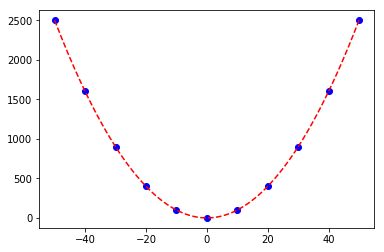

In [2]:
import matplotlib.pyplot as plt
 
"""
@brief:   计算n阶差商 f[x0, x1, x2 ... xn]
@param:   xi   所有插值节点的横坐标集合                                                        o
@param:   fi   所有插值节点的纵坐标集合                                                      /   \
@return:  返回xi的i阶差商(i为xi长度减1)                                                     o     o
@notice:  a. 必须确保xi与fi长度相等                                                        / \   / \
          b. 由于用到了递归，所以留意不要爆栈了.                                           o   o o   o
          c. 递归减递归(每层递归包含两个递归函数), 每层递归次数呈二次幂增长，总次数是一个满二叉树的所有节点数量(所以极易栈溢出)                                                                                    
"""
def get_order_diff_quot(xi = [], fi = []):
    if len(xi) > 2 and len(fi) > 2:
        return (get_order_diff_quot(xi[:len(xi) - 1], fi[:len(fi) - 1]) - get_order_diff_quot(xi[1:len(xi)], fi[1:len(fi)])) / float(xi[0] - xi[-1])
    return (fi[0] - fi[1]) / float(xi[0] - xi[1])
     
 
 
 
"""
@brief:  获得Wi(x)函数;
         Wi的含义举例 W1 = (x - x0); W2 = (x - x0)(x - x1); W3 = (x - x0)(x - x1)(x - x2)
@param:  i  i阶(i次多项式)
@param:  xi  所有插值节点的横坐标集合
@return: 返回Wi(x)函数
"""
def get_Wi(i = 0, xi = []):
    def Wi(x):
        result = 1.0
        for each in range(i):
            result *= (x - xi[each])
        return result
    return Wi
     
     
     
     
"""
@brief: 获得牛顿插值函数
@
"""
def get_Newton_inter(xi = [], fi = []):
    def Newton_inter(x):
        result = fi[0]
        for i in range(2, len(xi)):
            result += (get_order_diff_quot(xi[:i], fi[:i]) * get_Wi(i-1, xi)(x))
        return result
    return Newton_inter
     
         
 
"""
demo:
"""
if __name__ == '__main__':  
 
    '''插值节点, 这里用二次函数生成插值节点，每两个节点x轴距离位10 '''
    sr_x = [i for i in range(-50, 51, 10)]
    sr_fx = [i**2 for i in sr_x] 
     
    Nx = get_Newton_inter(sr_x, sr_fx)            # 获得插值函数
     
    tmp_x = [i for i in range(-50, 51)]          # 测试用例
    tmp_y = [Nx(i) for i in tmp_x]               # 根据插值函数获得测试用例的纵坐标
        
    ''' 画图 '''
    plt.figure("I love china")
    ax1 = plt.subplot(111)
    plt.sca(ax1)
    plt.plot(sr_x, sr_fx, linestyle = '', marker='o', color='b')
    plt.plot(tmp_x, tmp_y, linestyle = '--', color='r')
    plt.show()